In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("catalystDecisio.csv")

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [4]:
df["Kyphosis"]=df.Kyphosis.map({"present":1,"absent":0})

In [5]:
df["Kyphosis"]

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

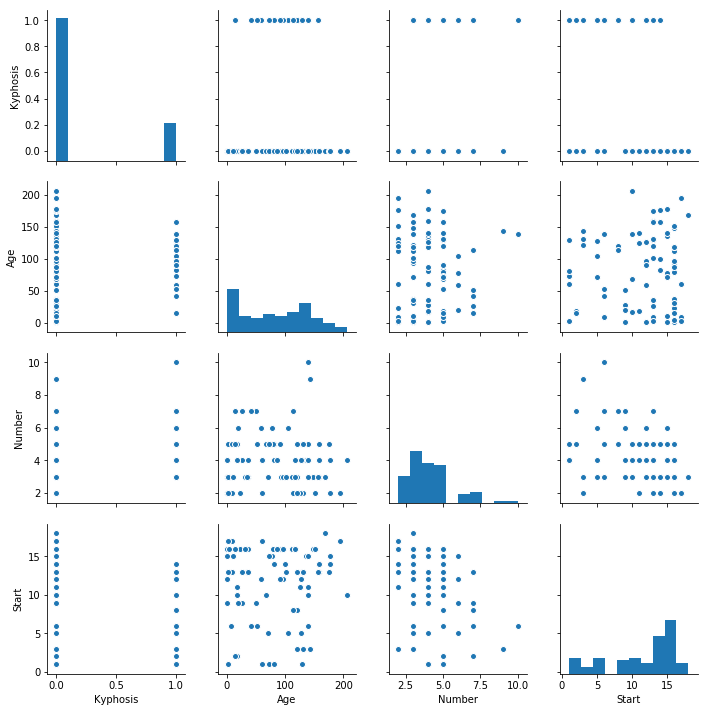

In [6]:
sns.pairplot(df)

In [7]:
x = df.drop("Kyphosis", axis = 1)

In [8]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [9]:
y = df['Kyphosis']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()

In [13]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions = logmodel.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[18  4]
 [ 3  0]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

             precision    recall  f1-score   support

          0       0.86      0.82      0.84        22
          1       0.00      0.00      0.00         3

avg / total       0.75      0.72      0.74        25



In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
predictions = clf.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[16  6]
 [ 2  1]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

             precision    recall  f1-score   support

          0       0.89      0.73      0.80        22
          1       0.14      0.33      0.20         3

avg / total       0.80      0.68      0.73        25



In [21]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus



In [22]:
io_data = StringIO()
tree.export_graphviz(clf,feature_names=list(df.columns[1:]),out_file=io_data,filled=True, rounded=True,special_characters=True)


In [23]:
graph = pydotplus.graph_from_dot_data(io_data.getvalue())

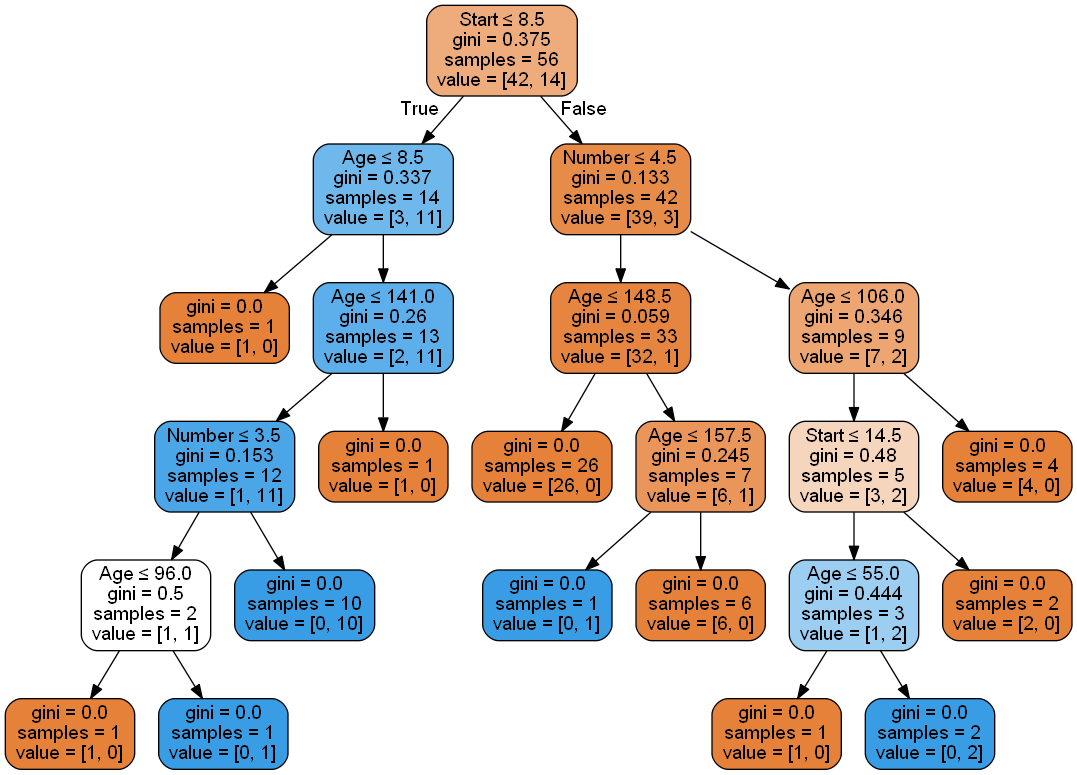

In [24]:
Image(graph.create_png())
#Image(graph.create_png())


In [25]:
print(graph)